### 최근접 이웃

In [1]:
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['seaborn-whitegrid'])

In [37]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

### K 최근접 이웃 분류

In [4]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9333333333333333


In [11]:
cross_validate(
  estimator=KNeighborsClassifier(),
  X=X, y=y,
  cv=5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00099897, 0.        , 0.00100088, 0.00100088, 0.00099897]),
 'score_time': array([0.00200033, 0.00200033, 0.00199866, 0.00199866, 0.00200033]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{
  'n_neighbors' : [3, 5, 7],
  'weights' : ['uniform', 'distance'],
  'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]

gs = GridSearchCV(
  estimator=KNeighborsClassifier(),
  param_grid=param_grid,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

In [13]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=16,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [14]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [15]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}

In [16]:
gs.best_score_

0.9800000000000001

In [27]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [18]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(X)

c:\Users\BSH\.virtualenvs\study-Im21C8TV\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\BSH\.virtualenvs\study-Im21C8TV\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-9.287437,-21.292446,0
1,-8.018337,-18.785372,0
2,-9.175928,-18.818295,0
3,-8.736096,-18.396364,0
4,-9.128146,-21.324881,0
...,...,...,...
145,5.765958,19.653337,2
146,4.128080,16.558451,2
147,5.152335,18.623308,2
148,5.091320,19.569067,2


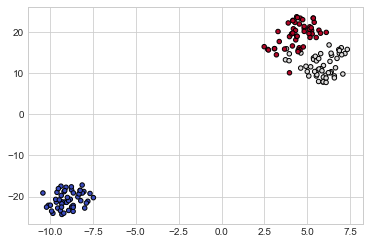

In [21]:
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

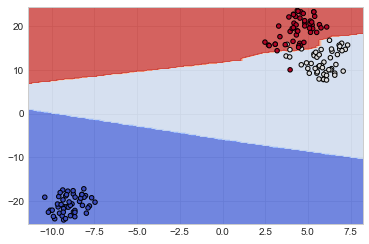

In [28]:
model = KNeighborsClassifier()
model.fit(x_comp, y)
pred = model.predict(x_comp)

xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

### K 최근접 이웃 회귀

In [29]:
diabetes = load_diabetes()

In [30]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['Target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [31]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [32]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [33]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.6093153608172585
평가 데이터 점수 : 0.3385270389203989


In [35]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)
print(f'학습 데이터 점수 : {model.score(X_train_scale, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test_scale, y_test)}')

학습 데이터 점수 : 0.603813594087701
평가 데이터 점수 : 0.3477333983423394


In [36]:
cross_validate(
  estimator=KNeighborsRegressor(),
  X=X, y=y,
  cv=5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.0010004 , 0.        , 0.0010004 , 0.00099945, 0.00100231]),
 'score_time': array([0.00200176, 0.00200176, 0.00100231, 0.00199795, 0.00199771]),
 'test_score': array([0.35008817, 0.36602995, 0.43172985, 0.3231243 , 0.41156846])}

In [40]:
pipe = Pipeline(
  [
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
  ]
)

param_grid = [{
  'model__n_neighbors' : [3, 5, 7],
  'model__weights' : ['uniform', 'distance'],
  'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]

gs = GridSearchCV(
  estimator=pipe,
  param_grid=param_grid,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

In [41]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=16,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [42]:
gs.best_params_

{'model__algorithm': 'ball_tree',
 'model__n_neighbors': 7,
 'model__weights': 'distance'}

In [43]:
gs.best_score_

0.40751067010691555